# Data Augmentation

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
from mediaug.visulize import show_image, plot_img_and_mask
from mediaug.image_utils import read_img
from mediaug.augment import perform_operation
from mediaug.dataset import Dataset

from matplotlib import pyplot as plt

In [51]:
# --- Visualization Tools ---
def show_operation(orig, op, name):
    plt.figure(figsize=(20,20))
    #orig = cv2.cvtColor(orig.img, cv2.COLOR_BGR2RGB)
    plt.subplot(151)
    plt.title(name)

    plt.imshow(orig.img)
    plt.axis('off')
    for i in range(4):
        aug_img, aug_mask = perform_operation(orig, op)
        #augm = cv2.cvtColor(augm, cv2.COLOR_BGR2RGB)
        plt.subplot(1,5,i+2)
        plt.imshow(aug_img)
        plt.axis('off')
    plt.show()

In [52]:
# load the dataset
slides = Dataset('/Users/sean/projects/cancerDetection/data/slides/')

In [57]:
# get an image
example = slides.random_sample()

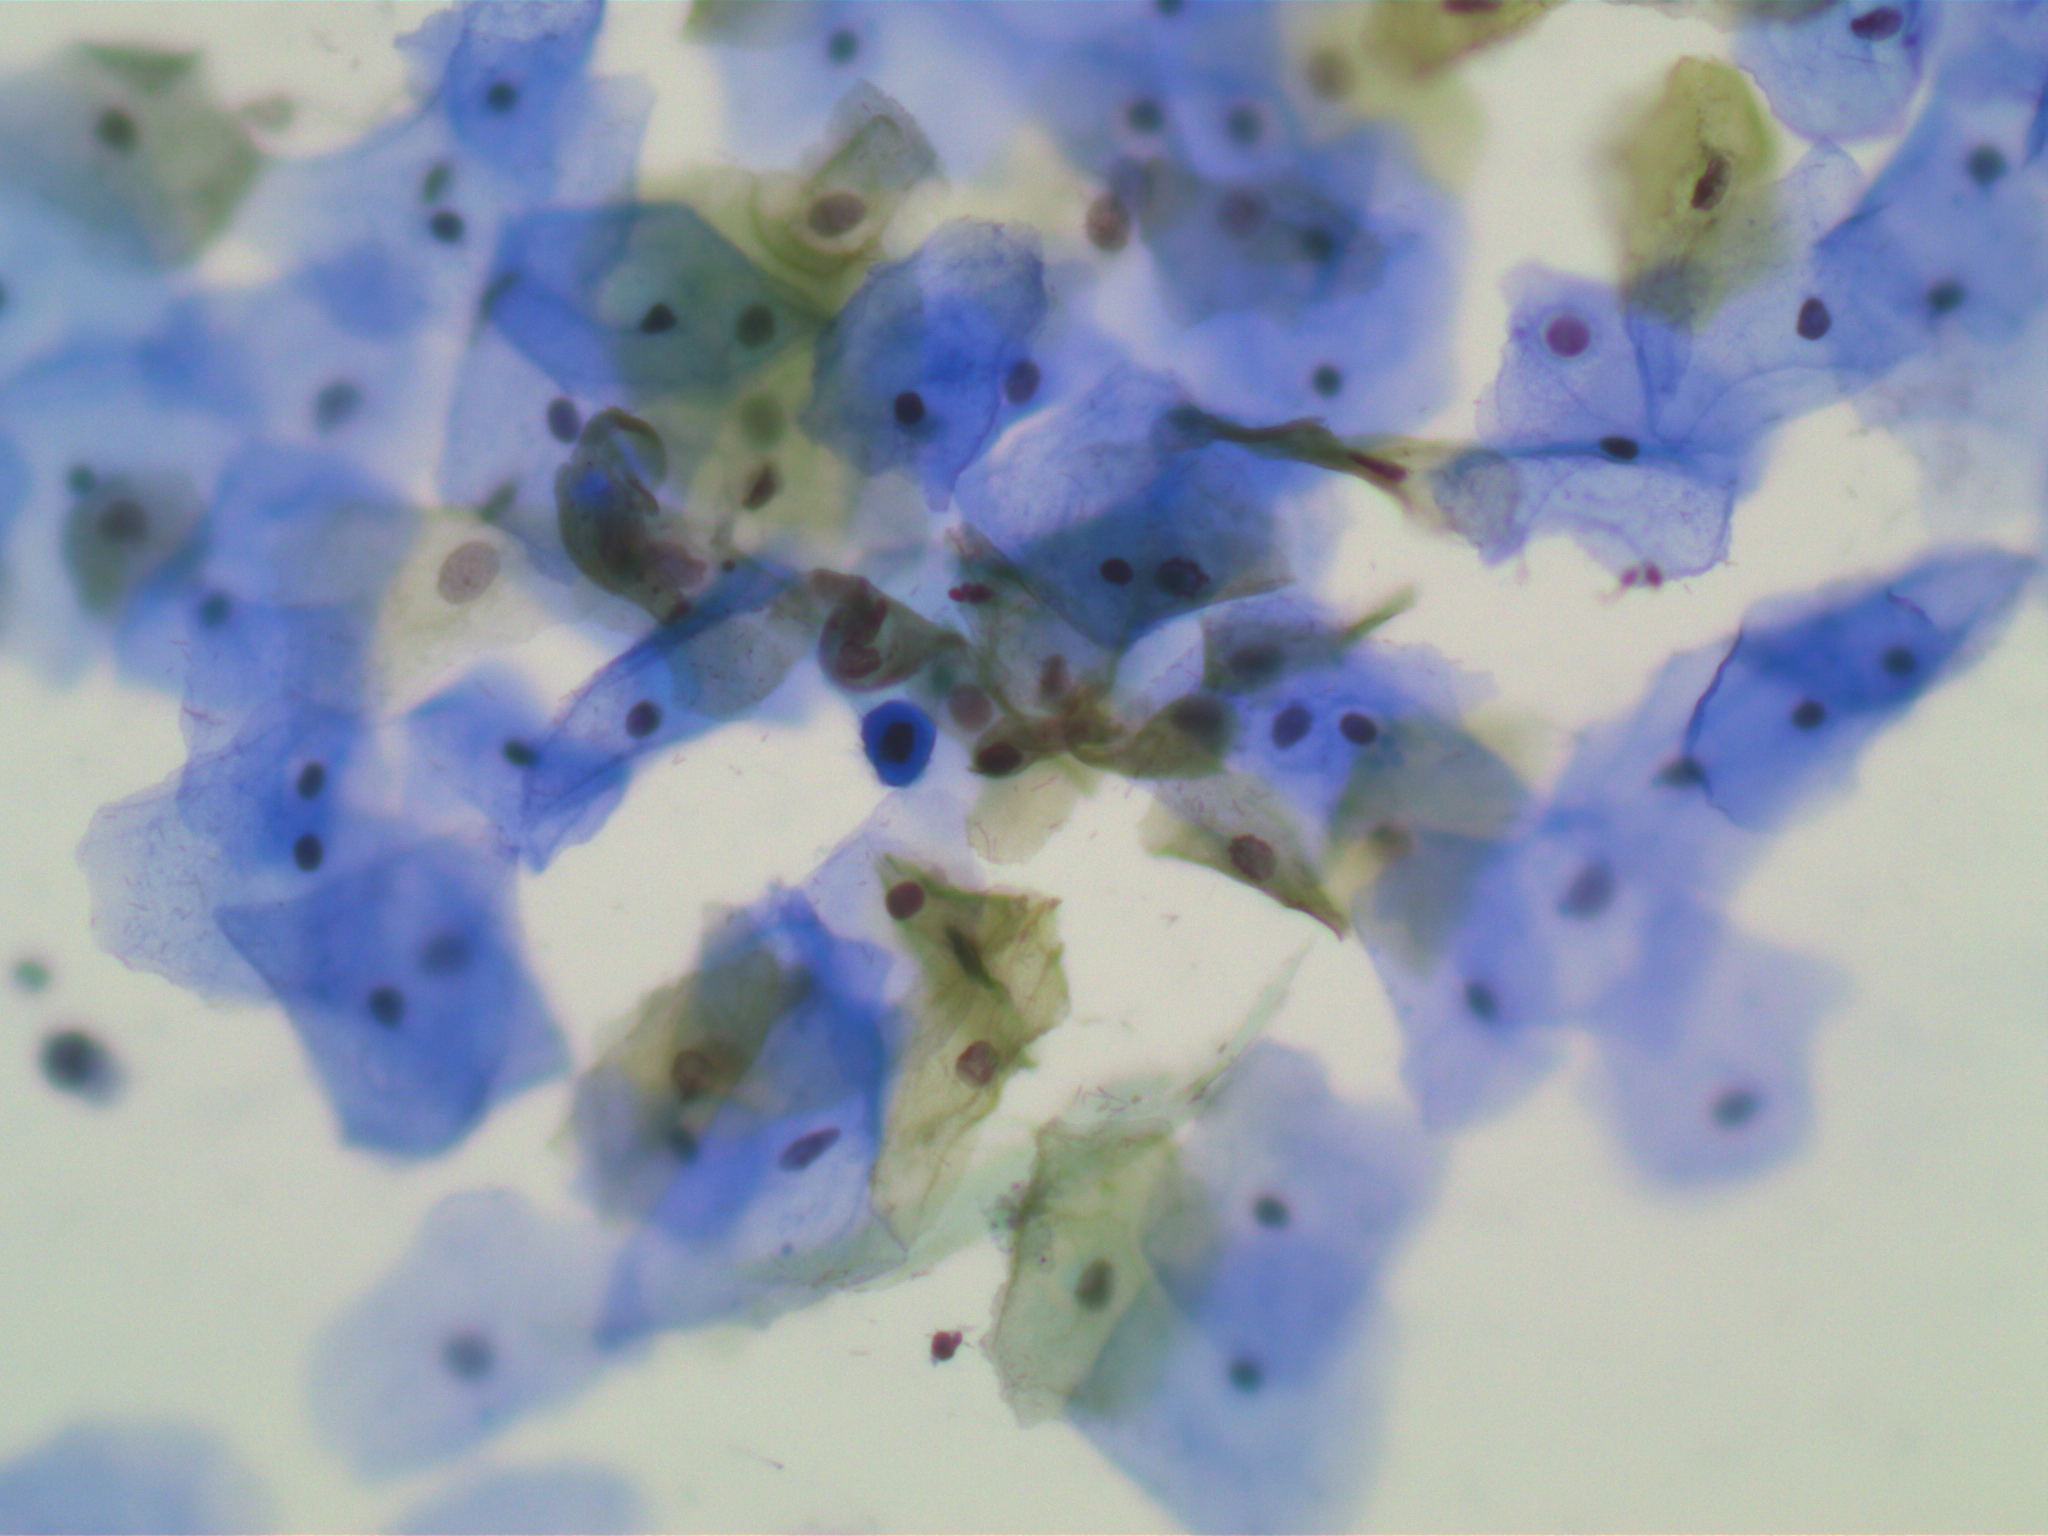

In [58]:
show_image(example.img)

## Augmentation Operations

An operation is a simple augmentation function. There are many different types of operations available. These take the same fromat as the python package Augmentor. Therefore we can use this wide library as well as the Operations customn to MediAug. Each Operation takes in a probability of occuring as well as other hyperparameters specific to the Operation.

In [62]:
import Augmentor.Operations as ops

In [63]:
op_list = [
    ops.Flip(1, 'RANDOM'),
    ops.RandomBrightness(1, .5, 2),
    ops.RandomColor(1, .5, 2),
    ops.RandomContrast(1, .3, 2),
    ops.RotateStandard(1, 90, 90),
    ops.CropRandom(1, .6),
    ops.Distort(1, 6, 6, 50),
    ops.Zoom(1, .5, 1.5)
]

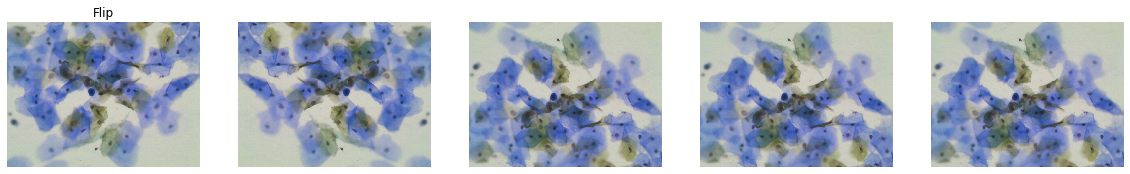

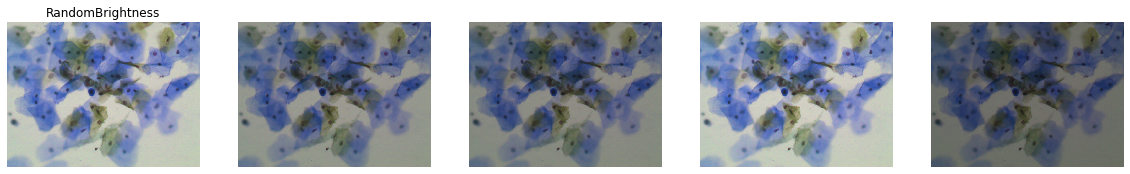

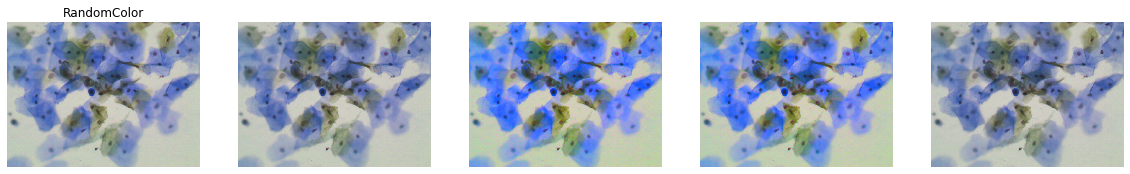

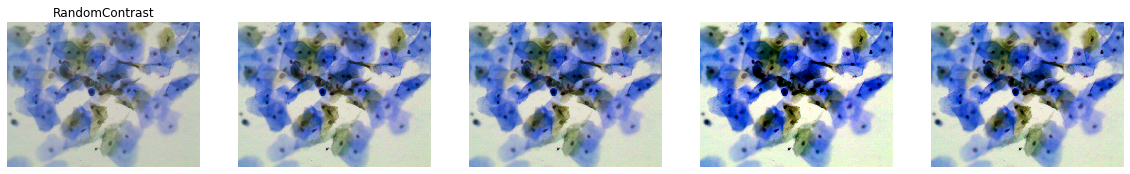

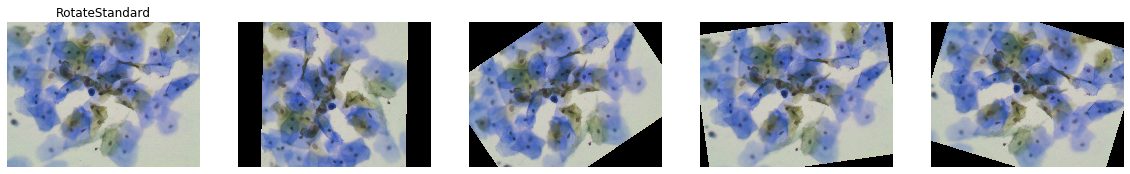

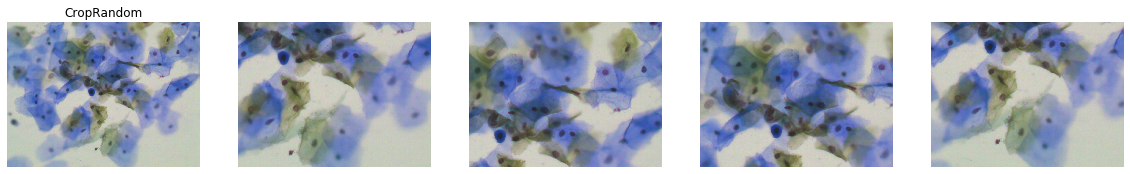

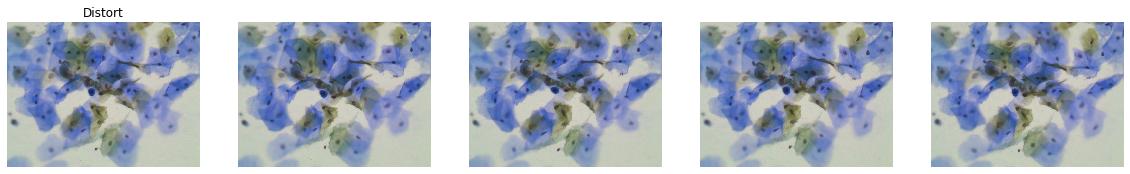

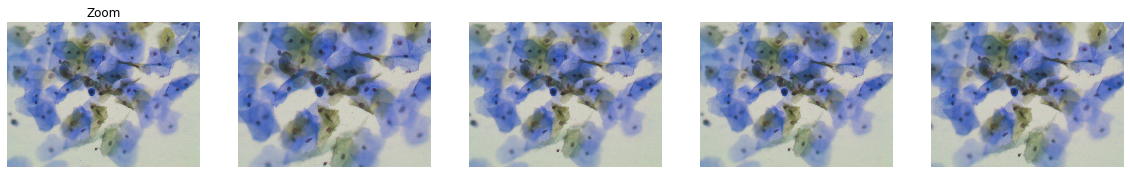

In [64]:
for op in op_list:
    aug_img, aug_mask = perform_operation(example, op)
    show_operation(example, op, str(op))

## Pipeline the Operations

Above we used the operations indavidually. The real power is when we add all these operations to a pipline and execute them all in sequence. MediAug also makes this easy by using the `Pipeline` object. This just takes a `Dataset` as an input and returns a generator for new data.

In [65]:
from mediaug.augment import Pipeline

In [110]:
pipeline = Pipeline(slides)

In [111]:
pipeline.operations = op_list

In [112]:
gen = pipeline.generator()

In [128]:
img, mask, _class = next(gen)

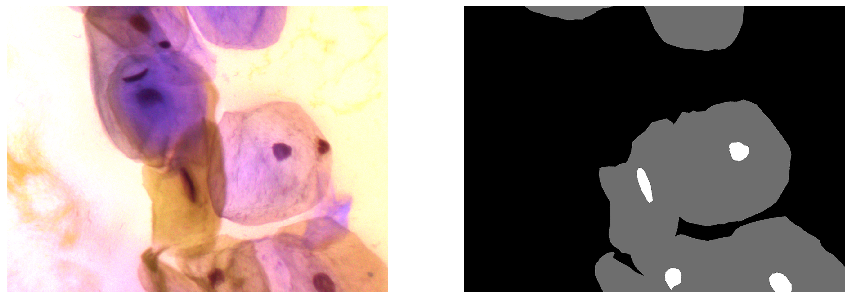

In [129]:
plot_img_and_mask(img, mask)